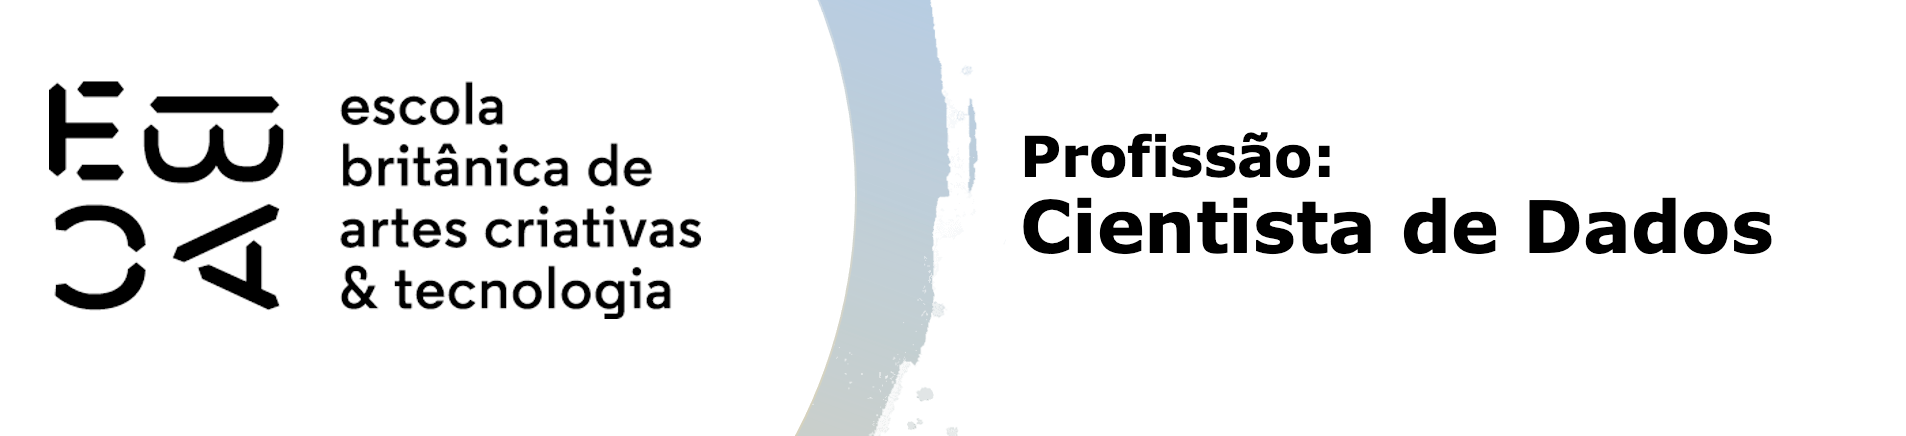

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import metrics
from scipy.stats import ks_2samp
from scipy.stats import t
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifZSWazc

In [2]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [3]:
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [4]:
# Número de linhas e colunas da base de dados
num_rows, num_cols = df.shape

# Número de linhas para cada mês em 'data_ref'
rows_per_month = df['data_ref'].value_counts()

# Imprimir os resultados
print(f"Número de linhas: {num_rows}")
print(f"Número de colunas: {num_cols}")
print("\nNúmero de linhas para cada mês em 'data_ref':")
print(rows_per_month)


Número de linhas: 750000
Número de colunas: 15

Número de linhas para cada mês em 'data_ref':
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64



Estatísticas descritivas para variáveis quantitativas:


               index     qtd_filhos          idade  tempo_emprego  \
count  750000.000000  750000.000000  750000.000000  624043.000000   
mean     8319.272793       0.433251      43.804733       7.748574   
std      4809.281774       0.739379      11.229868       6.687455   
min         0.000000       0.000000      22.000000       0.117808   
25%      4147.000000       0.000000      34.000000       3.049315   
50%      8324.000000       0.000000      43.000000       6.046575   
75%     12487.000000       1.000000      53.000000      10.183562   
max     16649.000000      14.000000      68.000000      42.906849   

       qt_pessoas_residencia         renda  
count          750000.000000  7.500000e+05  
mean                2.212241  2.323854e+04  
std                 0.903428  7.910601e+04  
min                 1.000000  1.076700e+02  
25%                 2.000000  3.467700e+03  
50%                 2.000000  7.861820e+03  
75%                 3.000000  1.831828e+04  
max               

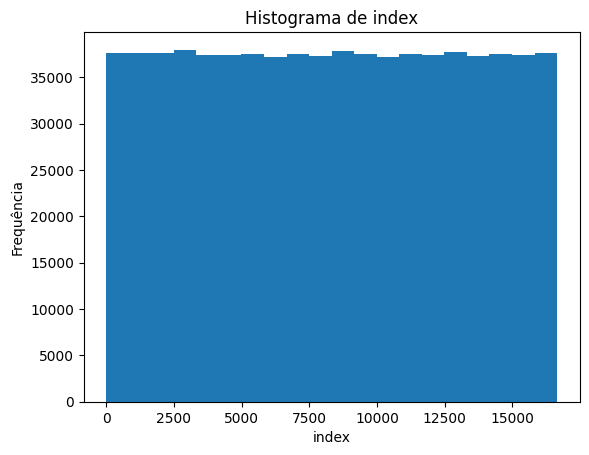

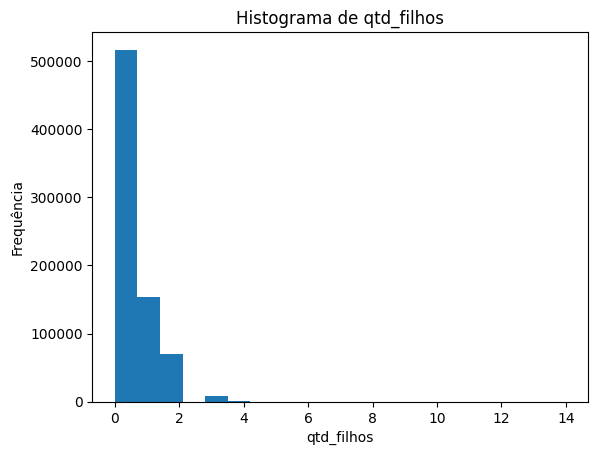

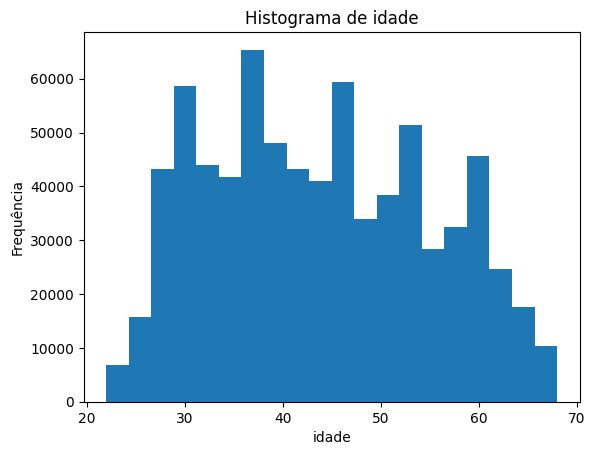

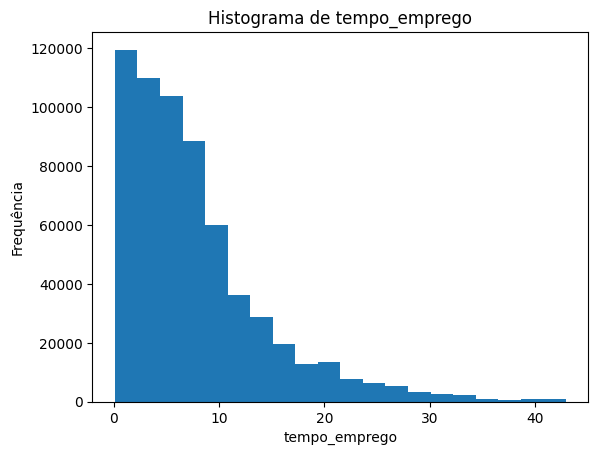

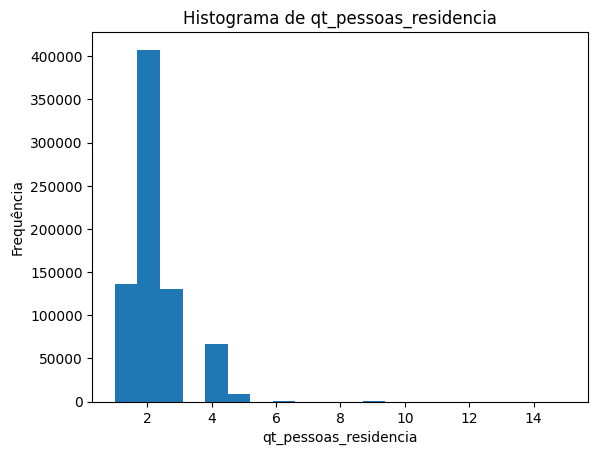

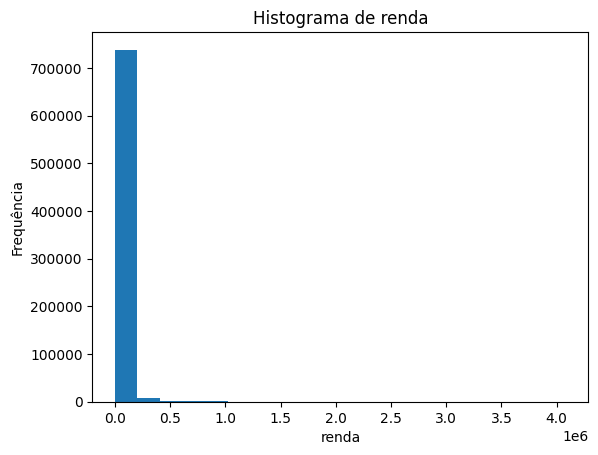


Gráfico de barras para variáveis qualitativas:


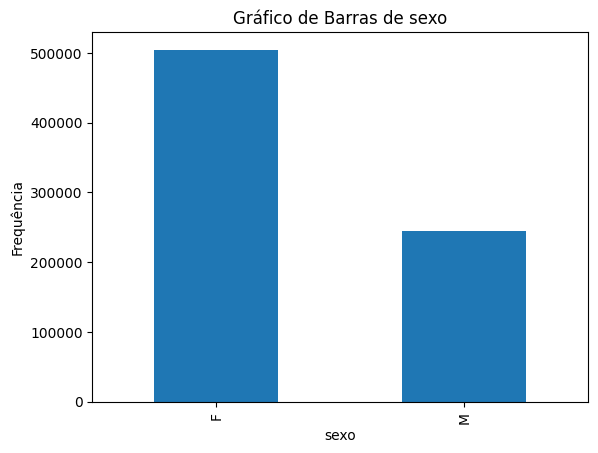

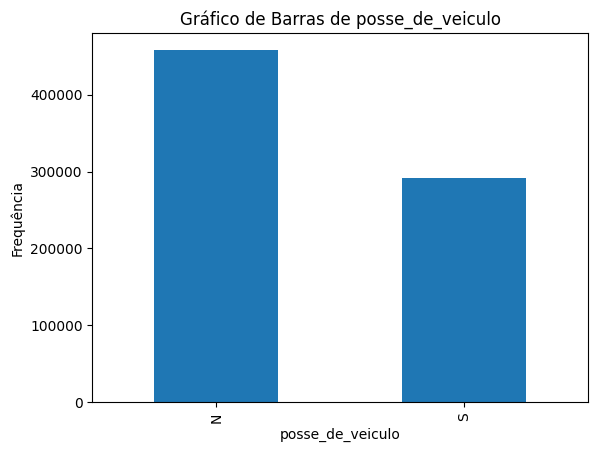

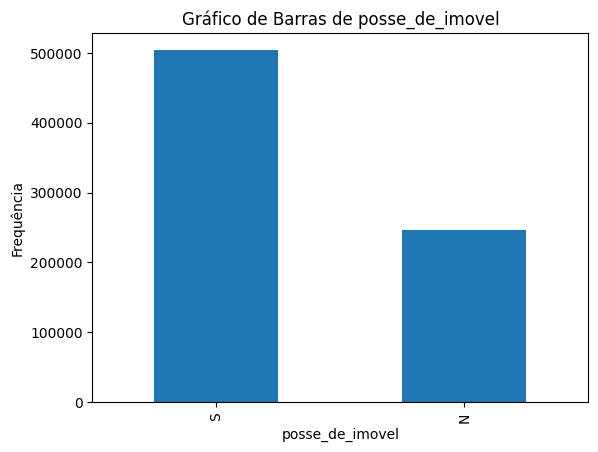

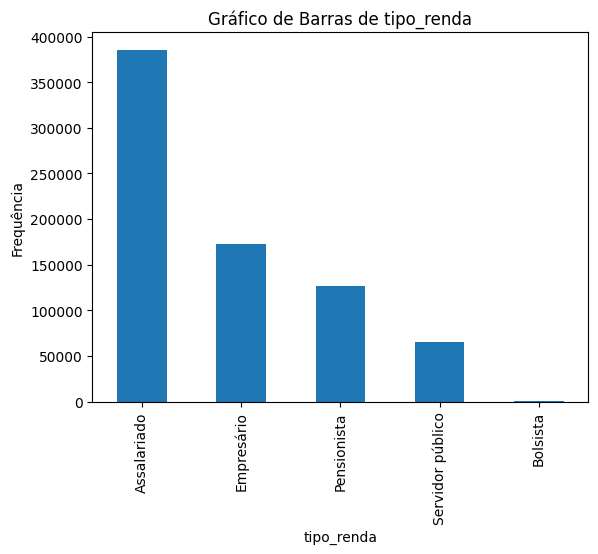

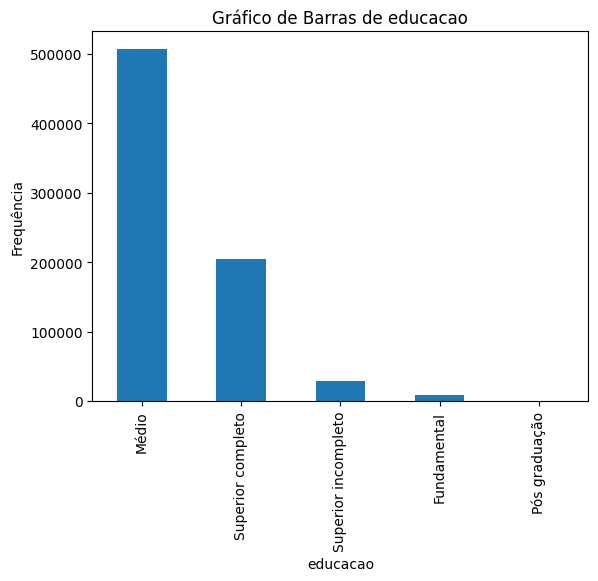

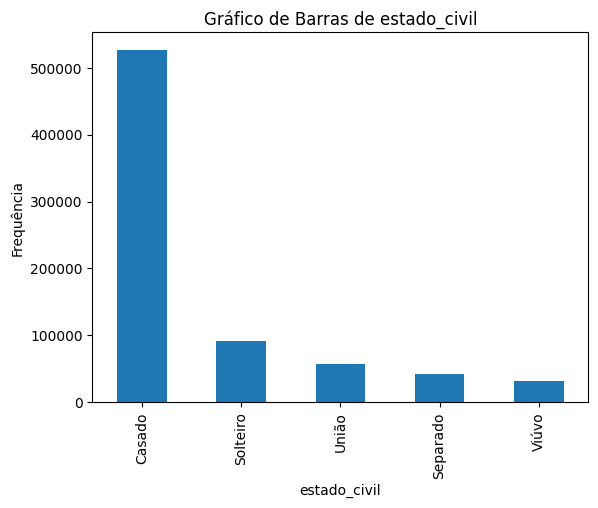

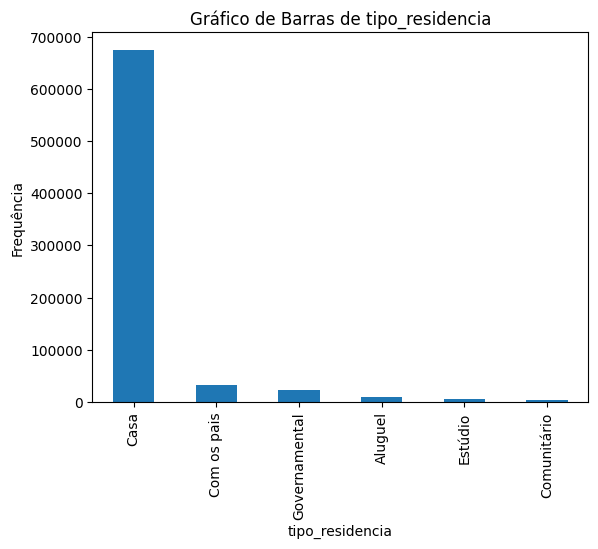

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Separar variáveis quantitativas e qualitativas
quantitative_vars = df.select_dtypes(include='number')
qualitative_vars = df.select_dtypes(include='object')

# Estatísticas descritivas para variáveis quantitativas
print("\nEstatísticas descritivas para variáveis quantitativas:")
print(quantitative_vars.describe())

# Frequência para variáveis qualitativas
print("\nFrequência para variáveis qualitativas:")
for var in qualitative_vars:
    print(df[var].value_counts())

# Histograma para variáveis quantitativas
print("\nHistograma para variáveis quantitativas:")
for var in quantitative_vars:
    df[var].plot.hist(bins=20)
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.show()

# Gráfico de barras para variáveis qualitativas
print("\nGráfico de barras para variáveis qualitativas:")
for var in qualitative_vars:
    df[var].value_counts().plot.bar()
    plt.title(f"Gráfico de Barras de {var}")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.show()


## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

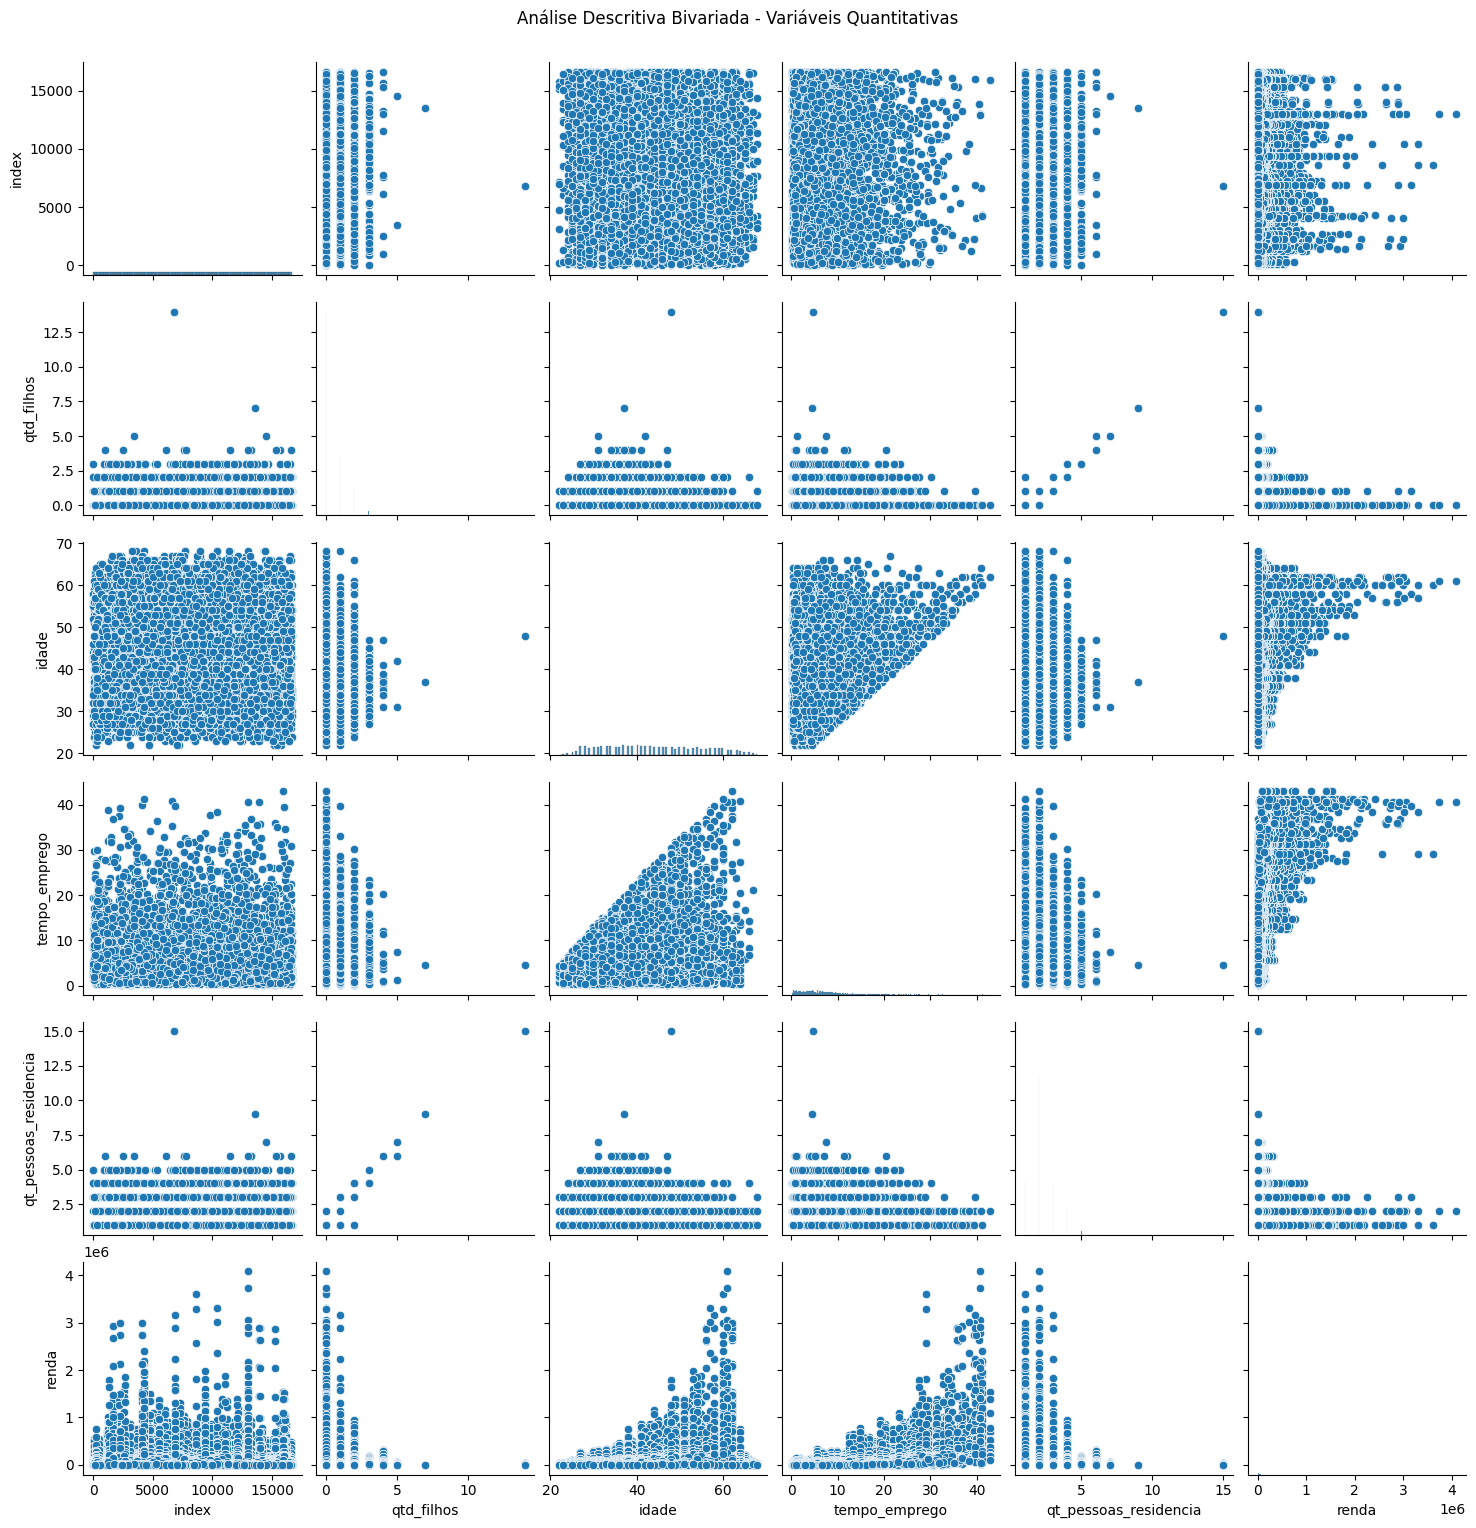

In [6]:
import seaborn as sns
# Separar variáveis quantitativas
quantitative_vars = df.select_dtypes(include='number')

# Análise descritiva bivariada entre variáveis quantitativas usando pairplot
sns.pairplot(quantitative_vars)
plt.suptitle("Análise Descritiva Bivariada - Variáveis Quantitativas", y=1.02)
plt.show()

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [7]:
df.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [8]:
pd.crosstab(df['mau'], date['oot'])


oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
False,1,1,1


## Criar um pipeline utilizando o sklearn pipeline 

In [9]:
from pycaret.classification import *

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

In [11]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [12]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
pca.fit(X_train)
X_train =  pca.transform(X_train)
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [13]:
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 3, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)
pipe = Pipeline(steps=[("scaler", scaler_pipe), 
                       ("pca", pca_pipe), 
                       ("logistic", logistic_pipe)])
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [15]:
pipe.fit(X_train, y_train)
pipe.predict(X_train)
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [16]:
pipe.named_steps
pipe.steps

[('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('logistic', LogisticRegression(max_iter=200))]

### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [17]:
pipe[0]

StandardScaler()

In [18]:
pipe[1]

PCA(n_components=15)

In [19]:
pipe[2]

LogisticRegression(max_iter=200)

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [20]:
pipe[1].transform(X_train)

array([[  0.87102006, -12.61635327, -18.956412  , ...,   4.98655473,
         16.14757214,   3.83127453],
       [  7.3900228 ,  -7.84635782, -16.49076616, ...,   8.39333337,
         20.06257354,   2.8817251 ],
       [  8.29000466, -10.02876766, -14.17169615, ...,   8.95429525,
         27.4256558 ,   4.14202955],
       ...,
       [-12.9063422 , -12.77058064,  16.69143813, ...,   1.38159026,
         10.49940009,   6.53694519],
       [-12.2019483 ,  -2.58799844,   7.00761774, ...,   8.57561019,
         10.01667377,   2.90673073],
       [-11.2145907 ,   2.61269372,   2.68275568, ...,   3.85991288,
         18.81126923,  -4.71927274]])

In [21]:
pca_pipe.transform(X_train)

array([[  0.87102006, -12.61635327, -18.956412  , ...,   4.98655473,
         16.14757214,   3.83127453],
       [  7.3900228 ,  -7.84635782, -16.49076616, ...,   8.39333337,
         20.06257354,   2.8817251 ],
       [  8.29000466, -10.02876766, -14.17169615, ...,   8.95429525,
         27.4256558 ,   4.14202955],
       ...,
       [-12.9063422 , -12.77058064,  16.69143813, ...,   1.38159026,
         10.49940009,   6.53694519],
       [-12.2019483 ,  -2.58799844,   7.00761774, ...,   8.57561019,
         10.01667377,   2.90673073],
       [-11.2145907 ,   2.61269372,   2.68275568, ...,   3.85991288,
         18.81126923,  -4.71927274]])

### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [22]:
import pandas as pd
dummy = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [23]:
dummy

,data_ref,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau,sexo_F,sexo_M,...,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,2015-01-01,5733,0,43,6.873973,1.0,2515.39,False,1,0,...,0,1,0,0,0,1,0,0,0,0
1,2015-01-01,727,0,35,4.526027,2.0,3180.19,False,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2015-01-01,6374,2,31,0.243836,4.0,1582.29,False,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2015-01-01,9566,0,54,12.772603,2.0,13721.17,False,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2015-01-01,9502,0,31,8.432877,1.0,2891.08,False,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,13689,0,48,3.038356,2.0,2109.99,False,0,1,...,0,0,0,0,0,1,0,0,0,0
749996,2016-03-01,7000,0,65,NaN,1.0,1389.39,False,1,0,...,0,1,0,0,0,1,0,0,0,0
749997,2016-03-01,14023,2,43,10.375342,4.0,649.06,True,0,1,...,0,0,0,0,0,1,0,0,0,0
749998,2016-03-01,2396,0,56,13.780822,1.0,4216.72,True,1,0,...,0,0,0,1,0,1,0,0,0,0


### Treinar um modelo de regressão logistica com o resultado

In [24]:
# Codificação one-hot para as variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

# Configurar o nível de log para ERROR
import logging
logging.basicConfig(level=logging.ERROR)

# Inicializar o ambiente do PyCaret
exp_clf = setup(data=df_encoded, target='mau')

# Criar o modelo de regressão logística
lr = create_model('lr')

# Visualizar os resultados do modelo
print(lr)

,Description,Value
0,Session id,7465
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 35)"
4,Transformed data shape,"(750000, 37)"
5,Transformed train set shape,"(525000, 37)"
6,Transformed test set shape,"(225000, 37)"
7,Numeric features,33
8,Date features,1
9,Rows with missing values,16.8%


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9218,0.7847,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9218,0.7828,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9218,0.7802,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9218,0.7768,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9218,0.7798,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9218,0.7884,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9218,0.7731,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9218,0.7674,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9218,0.7681,0.0000,0.0000,0.0000,0.0000,0.0000


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7465, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Salvar o pickle file do modelo treinado

In [27]:
import pickle

# Definir o nome do arquivo para salvar o modelo
nome_arquivo = 'model_final.pkl'

# Salvar o modelo usando o contexto de gerenciamento de arquivo
with open(nome_arquivo, 'wb') as file:
    pickle.dump(lr, file)

# Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [28]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [29]:
dataset = df.sample(50000)

In [30]:
dataset.drop(['index', 'data_ref'], axis=1, inplace=True)

In [31]:
data = dataset.sample(frac=0.995, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

In [32]:
from pycaret.classification import *
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [33]:
data.qtd_filhos = data.qtd_filhos.astype(float)

In [35]:
exp_clf = setup(data = data, target = 'mau', session_id=123)

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(49750, 13)"
4,Transformed data shape,"(49750, 30)"
5,Transformed train set shape,"(34825, 30)"
6,Transformed test set shape,"(14925, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [36]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [39]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9199,0.7878,0.0655,0.4500,0.1143,0.0962,0.1483
1,0.9216,0.7791,0.0545,0.5357,0.0990,0.0857,0.1525
2,0.9213,0.7873,0.0362,0.5556,0.0680,0.0589,0.1271
3,0.9170,0.7559,0.0399,0.3143,0.0707,0.0539,0.0877
4,0.9199,0.7889,0.0688,0.4634,0.1199,0.1015,0.1552
5,0.9225,0.7923,0.0509,0.6087,0.0940,0.0828,0.1602
6,0.9216,0.7893,0.0364,0.5556,0.0683,0.0591,0.1274
7,0.9173,0.7848,0.0327,0.2903,0.0588,0.0435,0.0743
8,0.9227,0.7848,0.0618,0.6071,0.1122,0.0991,0.1763


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

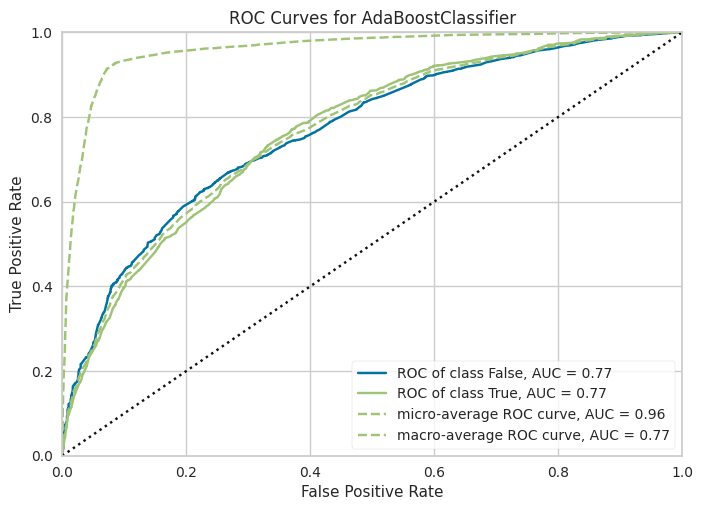

In [43]:
plot_model(ada, plot = 'auc')

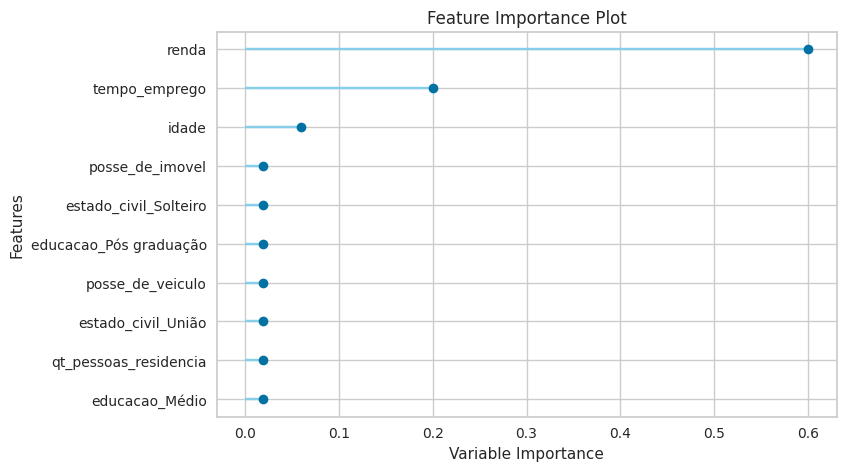

In [44]:
plot_model(ada, plot = 'feature')

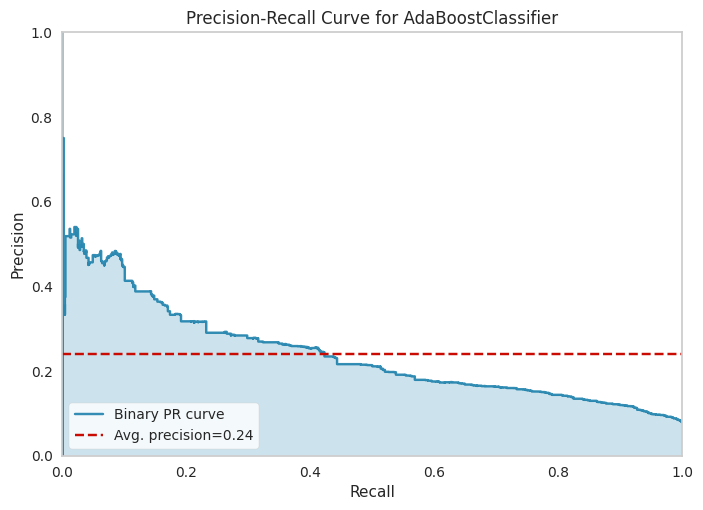

In [45]:
plot_model(ada, plot = 'pr')

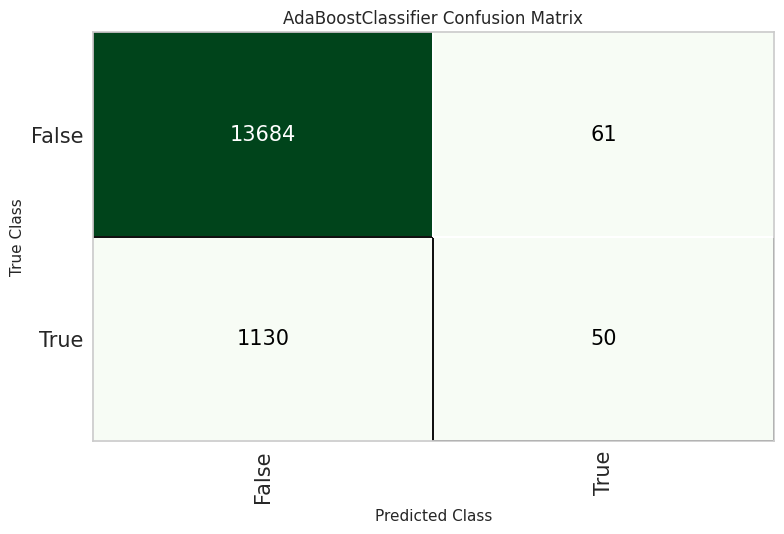

In [46]:
plot_model(ada, plot = 'confusion_matrix')

In [47]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [48]:
predict_model(ada);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9202,0.7669,0.0424,0.4505,0.0775,0.0647,0.1191


In [51]:
final_ligh = finalize_model(final_ligh)

In [52]:
print(final_ligh)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['qtd_filhos', 'idade',
                                             'tempo_emprego',
                                             'qt_pessoas_residencia', 'renda'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('cat...
                                    transformer=OneHotE

In [54]:
predict_model(final_ligh);

### Salvar o arquivo do modelo treinado

In [55]:
save_model(final_ligh, 'Final ada Model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('cat...
                                     tran